In [1]:
'''
Diya Ganesh, Colin Carnish, Jasmine Mccoy
June 22, 2024
DS3000 - Practicum 2: Model Development and Tuning
'''

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Question 1 — The Data Science Problem (0 pts)
In your own words, formulate the Data Science problem.

Develop a predictive model to identify individuals who are at risk of developing diabetes. We do this by working with a dataset that contains various health and demographic features that may help us find patterns between them and diabetes status. This dataset is from the CDC and was obtained from the Behavioral Risk Factor Surveillance System (BRFSS). According to the CDC, in 2021, 11.6% of the US population, or 38.4 million people, had diabetes, and there are estimated millions more who are unaware that they have diabetes or are at risk of being diabetic (pre-diabetic). There are many factors that influence the prevalence of diabetes, such as age, location, race, family history, lifestyle, and so forth.

## Question 2 — Prepare the Data (5 pts)
- Evaluate the dataset to determine if **ALL variables are represented in their expected type.**
- Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled:
  1. missing values
  2. invalid values
  3. outliers.
- Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.

In [2]:
# load in data and view part of dataframe
diabetes_df = pd.read_csv('/content/diabetes_health_indicators.csv')

diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# check for missing values
diabetes_df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No missing values!

In [4]:
# check data types
diabetes_df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

After cross referencing with the data dictionary, all of these columns can be integers.

In [5]:
# convert dtypes to integers
diabetes_df = diabetes_df.astype('int64')
diabetes_df.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

According to the data dictionary these columns should only have 0 and 1 as values: HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, and Sex. Will use this method to also check Diabetes_012 values because those are supposed to be 0, 1 and 2

GenHlth should have integer values from 1-5; MentHlth and PhysHlth  should have integer values from 1-30; Age should have integer values from 1-13  each corresponding to different age ranges; Education should have integer values from 1-6 based on highest level of education; Income should have integer values from 1-8 corresponding to different income ranges.

Looking at the value counts of each column can confirm if all the values are valid.

In [6]:
# check for invalid values in the binary columns
binary_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
               'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
               'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
               'DiffWalk', 'Sex']

# read all values in each column
for col in binary_cols:
  values = diabetes_df[col].value_counts().index.to_list()
  # check if values are 0 or 1, if not, print the column and invalid value
  for value in values:
    if value not in range(0, 2):
        print(f"{col} has invalid value of {value}")

# check for invalid values in Mental and Physical Health Columns
health_cols = ['MentHlth', 'PhysHlth']
for col in health_cols:
  values = diabetes_df[col].value_counts().index.to_list()
  # check if values are between 0 and 31, if not, print column & invalid value
  for value in values:
    if value not in range(0, 31):
      print(f"{col} has invalid value of {value}")

# lowest possible BMI ever recorded is 6.7, highest is 251.1
for value in diabetes_df['BMI'].value_counts().index.to_list():
  if value not in range(6, 252):
    print(f"BMI of {value} is invalid")

# check invalid values in Age, GenHlth, Education, and Income via value_counts
range_cols = ['Age', 'GenHlth', 'Education', 'Income']
for col in range_cols:
  print(diabetes_df[col].value_counts())

Diabetes_012 has invalid value of 2
Age
9     33244
10    32194
8     30832
7     26314
11    23533
6     19819
13    17363
5     16157
12    15980
4     13823
3     11123
2      7598
1      5700
Name: count, dtype: int64
GenHlth
2    89084
3    75646
1    45299
4    31570
5    12081
Name: count, dtype: int64
Education
6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: count, dtype: int64
Income
8    90385
7    43219
6    36470
5    25883
4    20135
3    15994
2    11783
1     9811
Name: count, dtype: int64


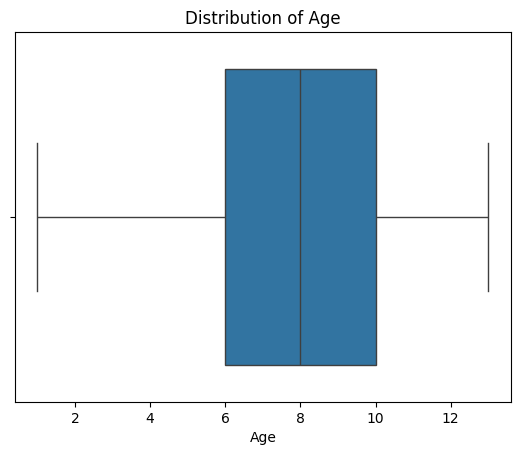

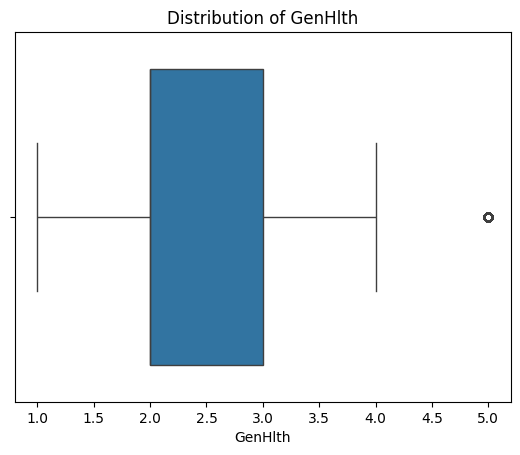

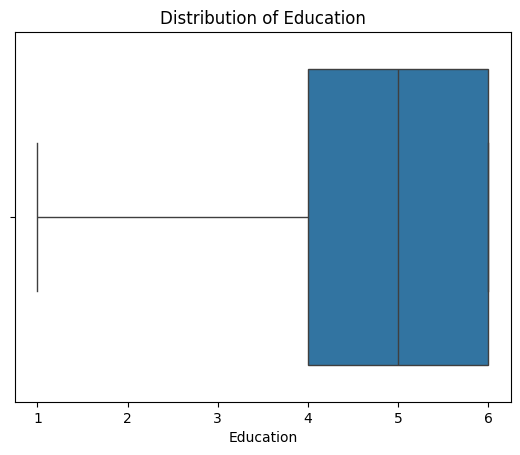

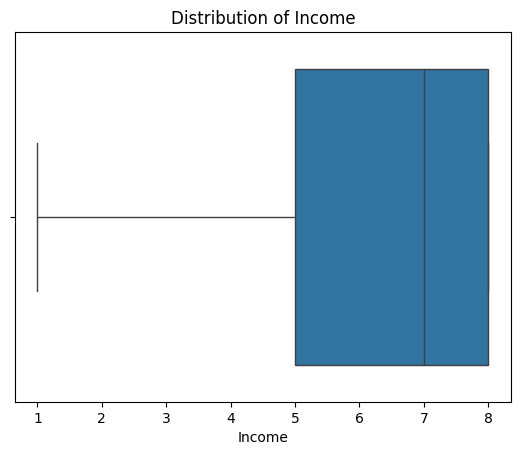

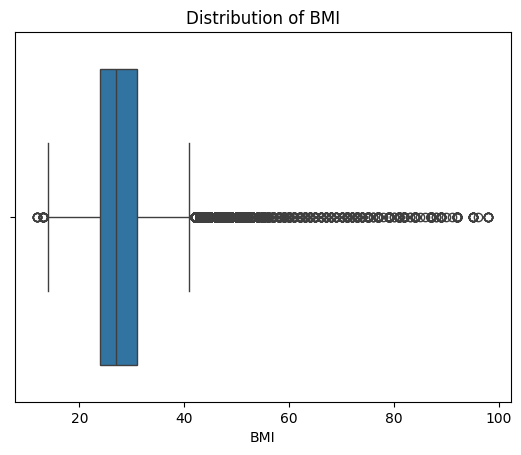

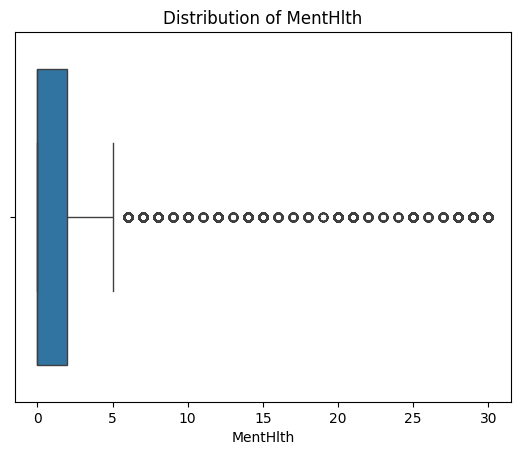

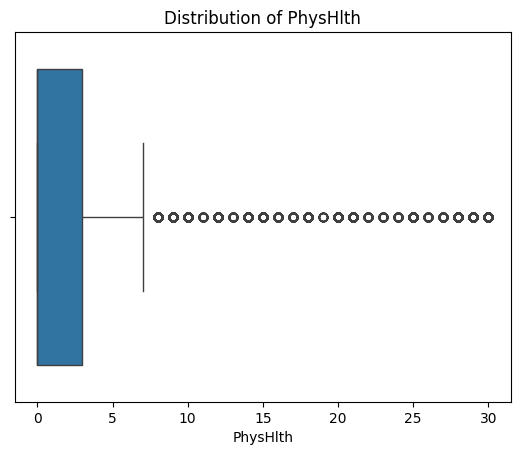

In [7]:
# check for outliers in range data columns:
for col in ['BMI', 'MentHlth', 'PhysHlth']:
  range_cols.append(col)
for col in range_cols:
  sns.boxplot(data=diabetes_df, x=col)
  plt.title(f"Distribution of {col}")
  plt.show()

The only columns with outliers are the Health related columns (General, Mental, Physical) and BMI.

The health columns' outliers are still within the ranges we expected so it may be due to value counts. We don't need to remove or replace these outliers.

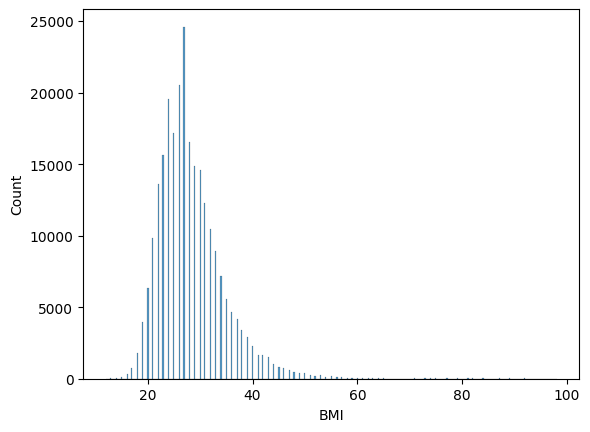

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64


In [8]:
# look at distribution of BMI data
sns.histplot(data=diabetes_df, x='BMI')
plt.show()

# view summary statistics of BMI data
print(diabetes_df['BMI'].describe())

In [9]:
# see how many outliers there are
# we will use iqr since z-scores will be impacted due to the right skew
q1 = diabetes_df['BMI'].quantile(0.25)
q3 = diabetes_df['BMI'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q1 + 1.5 * iqr
low_outliers = diabetes_df[(diabetes_df['BMI'] < lower_bound)]
high_outliers = diabetes_df[(diabetes_df['BMI'] > upper_bound)]

# check out the outliers
print(low_outliers['BMI'].value_counts())
print(high_outliers['BMI'].value_counts())

BMI
13    21
12     6
Name: count, dtype: int64
BMI
35    5575
36    4633
37    4147
38    3397
39    2911
      ... 
85       1
91       1
86       1
90       1
78       1
Name: count, Length: 61, dtype: int64


All of these BMIs are, while unlikely, still possible, so we cannot replace them without possible skewing the data.

## Question 3 — EDA (35 pts)
Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

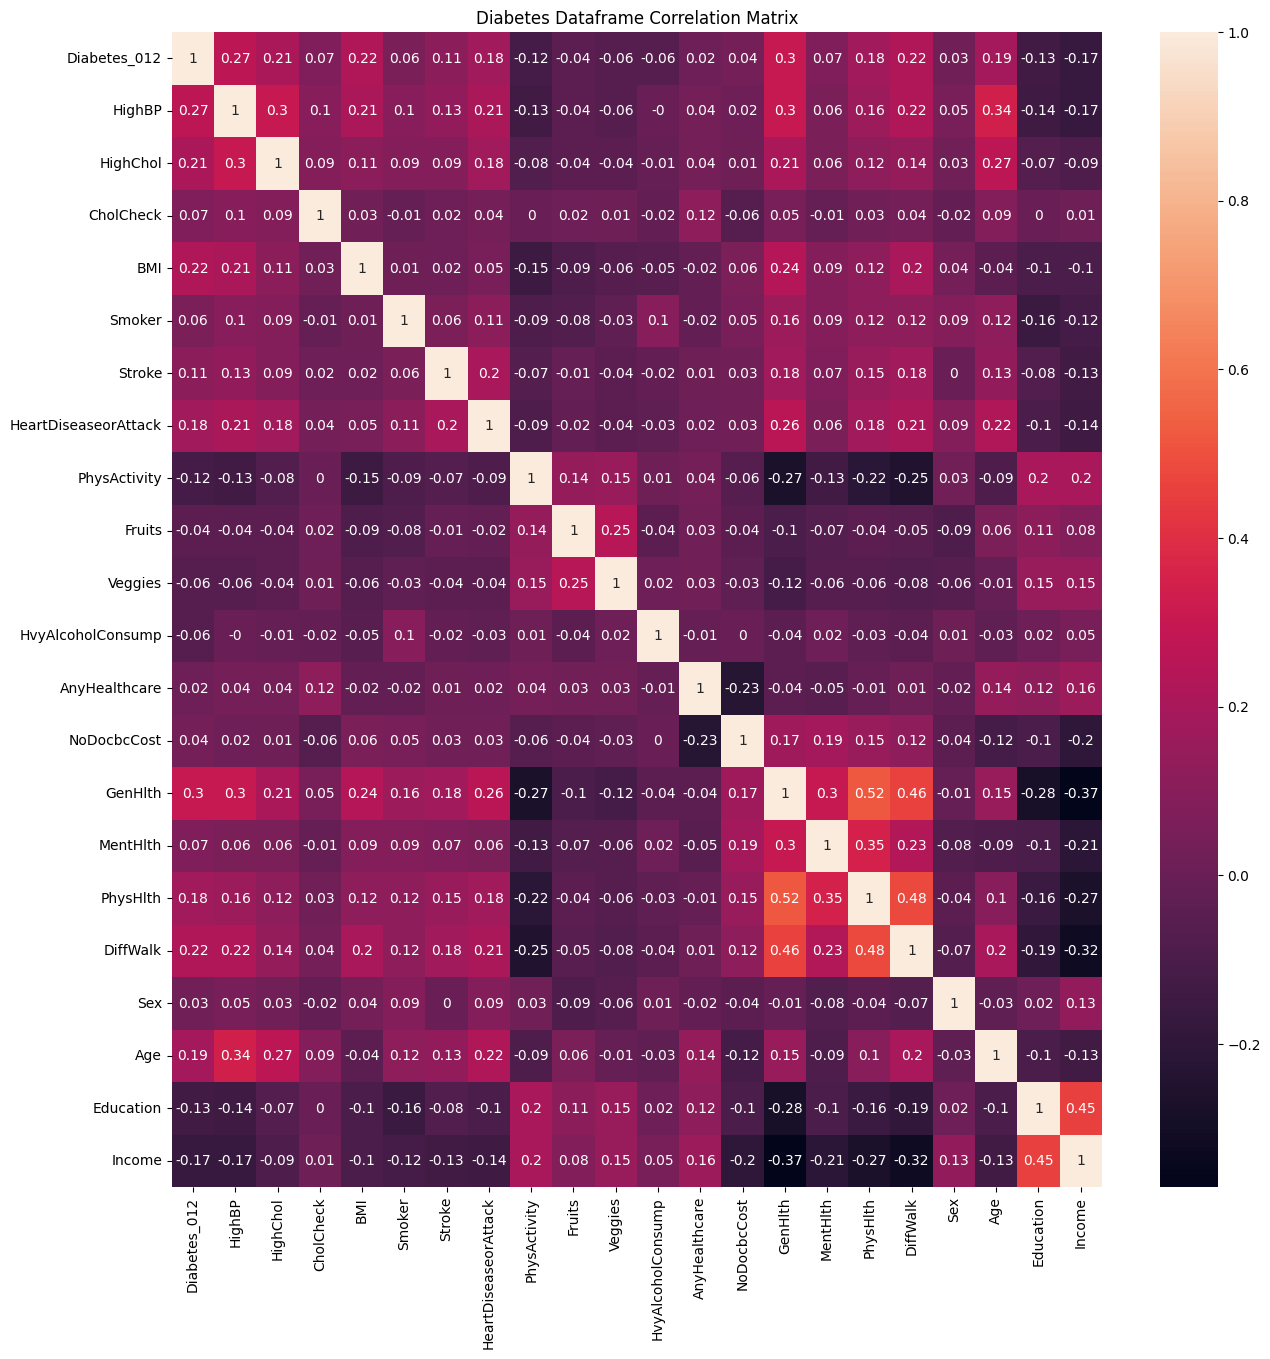

In [10]:
# view the correlations between each column via heat map
plt.figure(figsize=(15, 15))
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix.round(2), annot=True)
plt.title("Diabetes Dataframe Correlation Matrix")
plt.show()

Through this correlation matrix we can see that general health, physical health, and difficulty walking are all relatively highly correlated to each other. The correlation between income and education level implies that higher education is associated with higher income. While correlation does not equal causation there are possibly factors that play a role in the income and education level being correlated. Those with higher education levels tend to be in higher paying jobs, but lower income can also prevent someone's ability to pursue higher education. In the case of health, if someone has difficulty walking they may not be able to exercise as much leading to poorer physical health. Or vice versa where if someone is not exercising, over time simple exercises like walking can feel difficult. People tend to associate physical health much more strongly with general health than they do mental health which is probably why the correlation between mental health and general health is lower than that between physical and general health. These are these are categories that are more qualitative so correlation is a good visual. Most other categories are categorical and so the correlation heatmap may not show the relationships between these variables as effectively.

## Question 4a — Feature Selection (20 pts)
- Perform significance tests to determine if the patterns that are detected above are statistically significant. *Ensure that you discuss at least three patterns and the respective p-values.*
- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling.) *Do not arbitrarily select features.*

Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [11]:
# Continuous features
continuous_features = ['BMI', 'Age', 'MentHlth', 'PhysHlth', 'Income']

# Calculate point-biserial correlation and p-values
for feature in continuous_features:
    corr, p_value = stats.pointbiserialr(diabetes_df[feature],
                                         diabetes_df['Diabetes_012'])
    print(f"Point-biserial correlation between {feature} and Diabetes Status: {round(corr, 2)}, P-value: {round(p_value, 2)}")

Point-biserial correlation between BMI and Diabetes Status: 0.22, P-value: 0.0
Point-biserial correlation between Age and Diabetes Status: 0.19, P-value: 0.0
Point-biserial correlation between MentHlth and Diabetes Status: 0.07, P-value: 0.0
Point-biserial correlation between PhysHlth and Diabetes Status: 0.18, P-value: 0.0
Point-biserial correlation between Income and Diabetes Status: -0.17, P-value: 0.0


In [12]:
# Categorical features
categorical_features = ['PhysActivity', 'HighBP', 'HighChol',
                        'CholCheck', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                        'AnyHealthcare']

# Perform chi-square tests and p-values
for feature in categorical_features:
    contingency_table = pd.crosstab(diabetes_df[feature],
                                    diabetes_df['Diabetes_012'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature} and Diabetes Status: Chi2: {round(chi2, 2)}, P-value: {round(p_value, 2)}")

Chi-square test for PhysActivity and Diabetes Status: Chi2: 3789.3, P-value: 0.0
Chi-square test for HighBP and Diabetes Status: Chi2: 18794.64, P-value: 0.0
Chi-square test for HighChol and Diabetes Status: Chi2: 11258.92, P-value: 0.0
Chi-square test for CholCheck and Diabetes Status: Chi2: 1173.75, P-value: 0.0
Chi-square test for Fruits and Diabetes Status: Chi2: 454.35, P-value: 0.0
Chi-square test for Veggies and Diabetes Status: Chi2: 893.84, P-value: 0.0
Chi-square test for HvyAlcoholConsump and Diabetes Status: Chi2: 850.32, P-value: 0.0
Chi-square test for AnyHealthcare and Diabetes Status: Chi2: 69.08, P-value: 0.0


In [13]:
# Other relevant features, potential for coorelation
other_features = ['GenHlth', 'DiffWalk']

# Calculate correlation with target and p-values
for feature in other_features:
    corr, p_value = stats.pointbiserialr(diabetes_df[feature],
                                         diabetes_df['Diabetes_012'])
    print(f"Point-biserial correlation between {feature} and Diabetes Status: {round(corr, 2)}, P-value: {round(p_value, 2)}")

Point-biserial correlation between GenHlth and Diabetes Status: 0.3, P-value: 0.0
Point-biserial correlation between DiffWalk and Diabetes Status: 0.22, P-value: 0.0


Of the analysis we've performed, most have very low p-values, which suggests a strong association between the two values. The ones that have higher p-values are Mental Health, if they've had a cholesterol check in the last 5 years, how often they eat fruits and vegetables, if they drink heavily, and if they have healthcare. We should not use these features. Of those we did not check, none of smoking, NoDocbcCost, Education, or stroke has an effect on diabetes.

## Question 4b — Feature Engineering (10 pts)

Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the reasons.

It may be helpful to assess the coorelation between age and diabetes as a categorical feature instead of a continuous one because diabetes in children, which includes a range of ages, is rarer than in adults and seniors.

In [14]:
# Create a new categorical feature HealthRisks, which gives how many health
# risks they have, out of High Blood Pressure, High Cholesterol,
# and if they have coronary heart disease (CHD) or myocardial infarction.
# Can be either 0, 1, 2, or 3
diabetes_df['HealthRisks'] = diabetes_df[['HighBP', 'HighChol',
                                          'HeartDiseaseorAttack']].sum(axis=1)

# Display first few rows to verify
print(diabetes_df[['HighBP', 'HighChol', 'HeartDiseaseorAttack',
                   'HealthRisks']].head())

   HighBP  HighChol  HeartDiseaseorAttack  HealthRisks
0       1         1                     0            2
1       0         0                     0            0
2       1         1                     0            2
3       1         0                     0            1
4       1         1                     0            2


In [15]:
# Binning HealthRiskIndex for chi-square test
diabetes_df['HealthRisks_Category'] = pd.cut(diabetes_df['HealthRisks'],
                                             bins=[0, 1, 2, 3],
                                             labels=['Low', 'Medium', 'High'])

# Perform Chi-square test for HealthRiskIndex_Category and Diabetes Status
contingency_table_health_risk = pd.crosstab(diabetes_df['HealthRisks_Category'],
                                            diabetes_df['Diabetes_012'])

chi2_health_risk, p_value_health_risk, _, _ = stats.chi2_contingency(
    contingency_table_health_risk)

print(f"Chi-square test for HealthRisks_Category and Diabetes Status:\n")
print(f"Chi2: {round(chi2_health_risk, 2)}")
print(f"P-value: {p_value_health_risk}")

Chi-square test for HealthRisks_Category and Diabetes Status:

Chi2: 8245.41
P-value: 0.0


Although there is a high chi-square and low p-value, which indicates a strong coorelation and a high statistical significance, we've opted not to use the HealthRisks parameter because each of the three paramaters alone already has a low p-value, we don't want to double count either of them, and we don't want to get rid of them either.

## Question 5 — Partition the Data (5 pts)
- Partition the data into train/test sets. After which, perform the following:
  - encode any categorical data. Ensure that categorical variables are represented correctly.
  - normalize numeric data.

**Tip:** Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).



In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
import numpy as np

# Designates the two data sets to be split up for model training
X = diabetes_df[['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity',
               'GenHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Income']]
y = diabetes_df['Diabetes_012']

# Splits the data sets into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)

In [17]:
# Normalizes the quantitative training data
scaler = StandardScaler()
scaler.fit(X_train[['BMI', 'PhysHlth', 'Age', 'Income']])

X_train[['BMI', 'PhysHlth', 'Age', 'Income']] = scaler.transform(X_train[['BMI', 'PhysHlth', 'Age', 'Income']])

In [18]:
# Normalizes the quantitative test data
X_test[['BMI', 'PhysHlth', 'Age', 'Income']] = scaler.transform(X_test[['BMI', 'PhysHlth', 'Age', 'Income']])

## Question 6 — Build the Machine Learning Model (30 pts)
Build the ML model that predicts the target variable based on the selected features. Ensure that you:
  - Demonstrate the **training**, **evaluation** and **tuning** for *at least three algorithms that can handle non linear data and multiple input features/variables.* Note: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
  - Use GridSearchCV to tune *at least two hyperparameters **for each algorithm**.* Note: do not change the input features in your experiments.

##Model #1: Multinomial Logistic Regression

In [19]:
# Designates the LR classifier, then fits it to the training data
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [20]:
# Makes the model's prediction for patient diabetic statuses
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [21]:
round(metrics.recall_score(y_test, y_pred, average = 'micro'), 2)

0.85

In [22]:
# Sets the necessary parameters to be tuned using the grid search
params = {'n_jobs': np.arange(4,7,1),
          'max_iter': [200, 500, 800]
          }

# Performs the grid search to find optimal parameters
# Also performs cross validation for the model
lr = LogisticRegression(multi_class='multinomial')
lr_grid = GridSearchCV(lr, params, cv = 5, return_train_score = True)
lr_grid.fit(X_train, y_train)

# Calculates the optimal parameters and the best accuracy score
best_params = (lr_grid.best_params_)
best_score = round(lr_grid.best_score_, 2)

print(best_params)
print(best_score)

{'max_iter': 200, 'n_jobs': 4}
0.85


##Model #2: Random Forest Classifier

In [23]:
# Creates the Random Forest Classifier, fits it to the data
rf = RandomForestClassifier(random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [24]:
# Creates the list of predictions
y_pred = rf.predict(X_test)

In [25]:
round(metrics.recall_score(y_test, y_pred, average = 'micro'),2)

0.83

In [26]:
# Sets the necessary parameters to be tuned using the grid search
params = {'n_estimators': np.arange(90,150,20),
          'criterion' : ['entropy', 'gini'],
          }

# Performs the grid search to find optimal parameters
# Also performs cross validation for the model
rf = RandomForestClassifier(random_state = 7)
rf_grid = GridSearchCV(rf, params, cv = 5, return_train_score = True)
rf_grid.fit(X_train, y_train)

# Calculates the optimal parameters and the best accuracy score
best_params = (rf_grid.best_params_)
best_score = round(rf_grid.best_score_, 2)

print(best_params)
print(best_score)

{'criterion': 'entropy', 'n_estimators': 130}
0.83


##Model #3: K-Nearest Neighbors Classifier

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [28]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(predictions)
print(y_test)

[0 0 0 ... 0 0 0]
136835    0
118541    0
89764     0
25896     0
126449    0
         ..
90698     0
194474    2
3117      0
13292     2
201104    0
Name: Diabetes_012, Length: 76104, dtype: int64


In [29]:
round(metrics.recall_score(y_test, predictions, average = 'micro'), 2)

0.83

In [30]:
# Sets the necessary parameters to be tuned using the grid search
params = {'n_neighbors': [4, 6, 7],
          'weights': ['uniform', 'distance']
          }

# Performs the grid search to find optimal parameters
# Also performs cross validation for the model
knn_grid = GridSearchCV(knn, params, cv = 5, return_train_score = True)
knn_grid.fit(X_train, y_train)

# Calculates the optimal parameters and the best accuracy score
best_params = (knn_grid.best_params_)
best_score = round(knn_grid.best_score_, 2)

print(best_params)
print(best_score)

{'n_neighbors': 6, 'weights': 'uniform'}
0.84


## Question 7 — Analyze the Models (15 pts)
Analyze the evaluated models. For each algorithm, ensure that you:
- Display:
  1. the best model
  2. the best score that was obtained.
- Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.

NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.


###Model 1: Multinomial Logistic Regression

The best model using Multinomial Logistic Regression was created by implementing 200 as the max_iter parameter and 4 for the n_jobs parameter - this resulted in a recall score of .85, which is the same as the Multinomial Logistic Regression model using the default parameters.

In [31]:
# Displays the results of the cross validation in order to check for bias/variance issues
cv_results = pd.DataFrame(lr_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending = False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.84618,0.000187,0.84606,0.000823
1,0.84618,0.000187,0.84606,0.000823
2,0.84618,0.000187,0.84606,0.000823
3,0.84618,0.000187,0.84606,0.000823
4,0.84618,0.000187,0.84606,0.000823
5,0.84618,0.000187,0.84606,0.000823
6,0.84618,0.000187,0.84606,0.000823
7,0.84618,0.000187,0.84606,0.000823
8,0.84618,0.000187,0.84606,0.000823


Since the mean train score and the mean test score are extremely similar, and with a very low standard deviation, it can be concluded that there are no bias-variance issues present.

This high recall score means that the model is quite solid in its predictions and avoidance of false negatives, however, in dealing with sensitive and crucial medical data, it still has a ways to go before being properly usable for its purpose, as false negatives must be avoided at all costs.

###Model 2: Random Forest Classification

The best model using Random Forest Classification was created by using 130 for the n_estimators parameter and entropy for the criterion parameter - this resulted in a recall score of .83, about the same as the Random Forest Classifier model using the default parameters.

In [32]:
# Displays the results of the cross validation in order to check for bias/variance issues
cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending = False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]

,mean_train_score,std_train_score,mean_test_score,std_test_score
2,0.964778,0.000152,0.827218,0.001402
1,0.964770,0.000153,0.827178,0.001604
0,0.964740,0.000140,0.827099,0.001388
4,0.964770,0.000152,0.827037,0.001596
5,0.964781,0.000150,0.826975,0.001526
3,0.964747,0.000145,0.826649,0.001504


Since the mean train score is far higher than the mean test score, along with a significant difference in the standard deviation, we can assume that there are some bias-variance issues present here. This model suffers from overfitting, since the model is far too fitted to the training data, and suffers from decreased accuracy in predicting the testing data.

The recall score is still quite high, which means that the model is quite solid in its predictions and avoidance of false negatives, however, in dealing with sensitive and crucial medical data, it still has a ways to go before being properly usable for its purpose, as false negatives must be avoided at all costs.

###Model 3: K Nearest Neighbors Classification

The best model using K Nearest Neighbors Classification was created by implementing 6 for the n_neighbors parameter and uniform for the weights parameter - this resulted in a recall score of .84.

In [33]:
# Displays the results of the cross validation in order to check for bias/variance issues
cv_results = pd.DataFrame(knn_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending = False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]

,mean_train_score,std_train_score,mean_test_score,std_test_score
2,0.864414,0.000250,0.838937,0.001000
4,0.863356,0.000329,0.837101,0.000758
0,0.871465,0.000251,0.836352,0.000399
5,0.964743,0.000149,0.825112,0.001006
3,0.964746,0.000156,0.822713,0.000973
1,0.964559,0.000104,0.815364,0.000790


While there are some issues with overfitting for less optimal models (improper n_neighbors values), the optimal model has very little difference in the training and testing scores, meaning that it doesn't have any bias-variance issues, while the less optimal models do.

This high recall score means that the model is quite solid in its predictions and avoidance of false negatives, however, in dealing with sensitive and crucial medical data, it still has a ways to go before being properly usable for its purpose.

## Question 8 — Potential Impacts & Bias (10 pts)

- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


Doctors and health care professionals would benefit from this analysis, they would have and be able to provide their patients with more information on the coorelation between diabetes and other lifestyle/health attributes. This could help inform them on the best course of action when dealing with a patient and help patients to be more prepared for what to expect.

The concerns of bias we have from analysis we've conducted earlier is the lack of coorelation our data shows between diet and diabetes although it is known that there is one. This could be due to the nature of the means that the data is collected, people may feel inclined to say they have a healthier lifestyle than they actually do and this inacurate data may be what we're seeing. Another concern is with analysing the data of certain groups in the context of the whole instead of their subgroup, sex and age being examples. In the case that the model would make a more accurate prediction of it were using only the relevant subgroup instead of the entire sample, it would be in everyone's best interest to use the predictions our model makes (which references the entire sample) with caution.

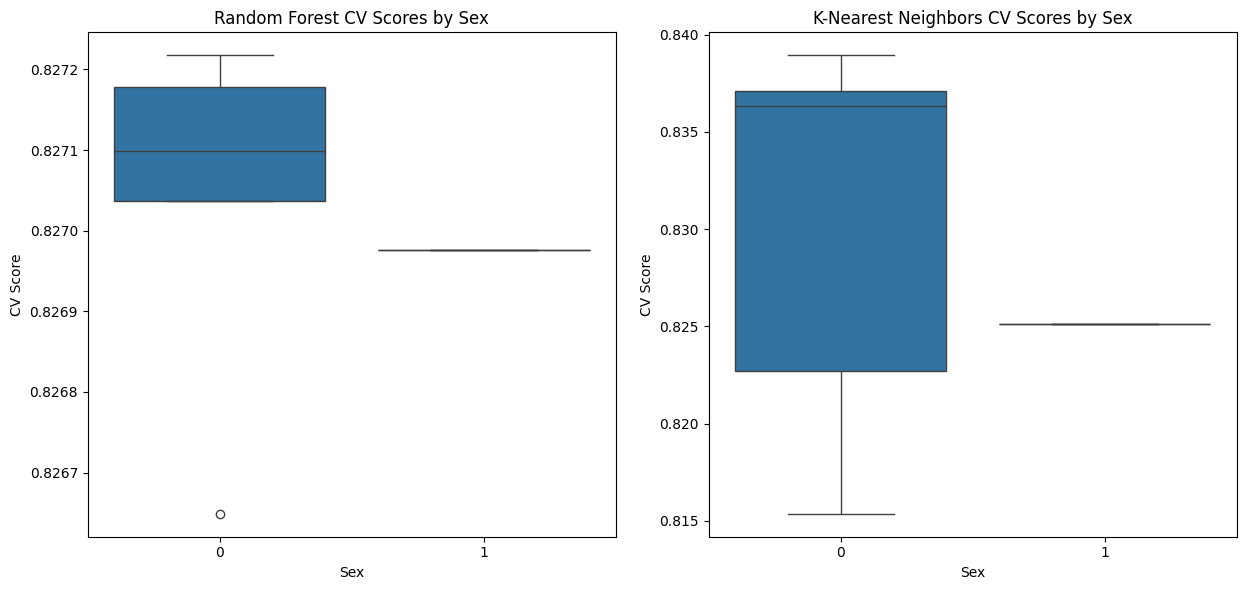

In [34]:
# Assuming cv_results_lr, cv_results_rf, and cv_results_knn are the cv_results from GridSearchCV for each model.

# Example: Using cv_results from Logistic Regression GridSearchCV
cv_results_lr = pd.DataFrame(lr_grid.cv_results_)
cv_results_rf = pd.DataFrame(rf_grid.cv_results_)
cv_results_knn = pd.DataFrame(knn_grid.cv_results_)

# Add the scores to the original dataframe for visualization
results_df = diabetes_df.copy()
results_df['LR_Score'] = cv_results_lr['mean_test_score']
results_df['RF_Score'] = cv_results_rf['mean_test_score']
results_df['KNN_Score'] = cv_results_knn['mean_test_score']

# Visualize the distribution of scores across Sex
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
sns.boxplot(x='Sex', y='RF_Score', data=results_df)
plt.title('Random Forest CV Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('CV Score')

plt.subplot(1, 3, 3)
sns.boxplot(x='Sex', y='KNN_Score', data=results_df)
plt.title('K-Nearest Neighbors CV Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('CV Score')

plt.tight_layout()
plt.show()

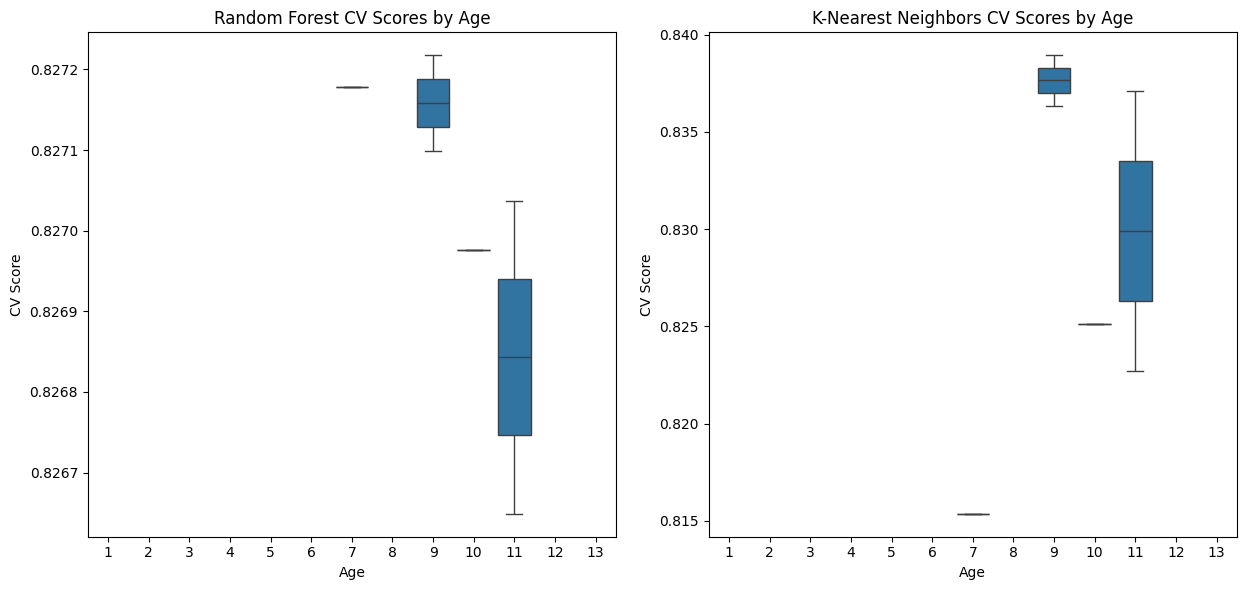

In [35]:
# Visualize the distribution of scores across Age
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
sns.boxplot(x='Age', y='RF_Score', data=results_df)
plt.title('Random Forest CV Scores by Age')
plt.xlabel('Age')
plt.ylabel('CV Score')

plt.subplot(1, 3, 3)
sns.boxplot(x='Age', y='KNN_Score', data=results_df)
plt.title('K-Nearest Neighbors CV Scores by Age')
plt.xlabel('Age')
plt.ylabel('CV Score')

plt.tight_layout()
plt.show()